In [129]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [130]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [131]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Data Preprocessing

In [132]:
df.shape

(4981, 11)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [134]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [135]:
df[df['age'] == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1487,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3057,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


## Encoding Categorical Variable

In [136]:
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [137]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [138]:
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

## Exploratory Data Analysis (EDA)

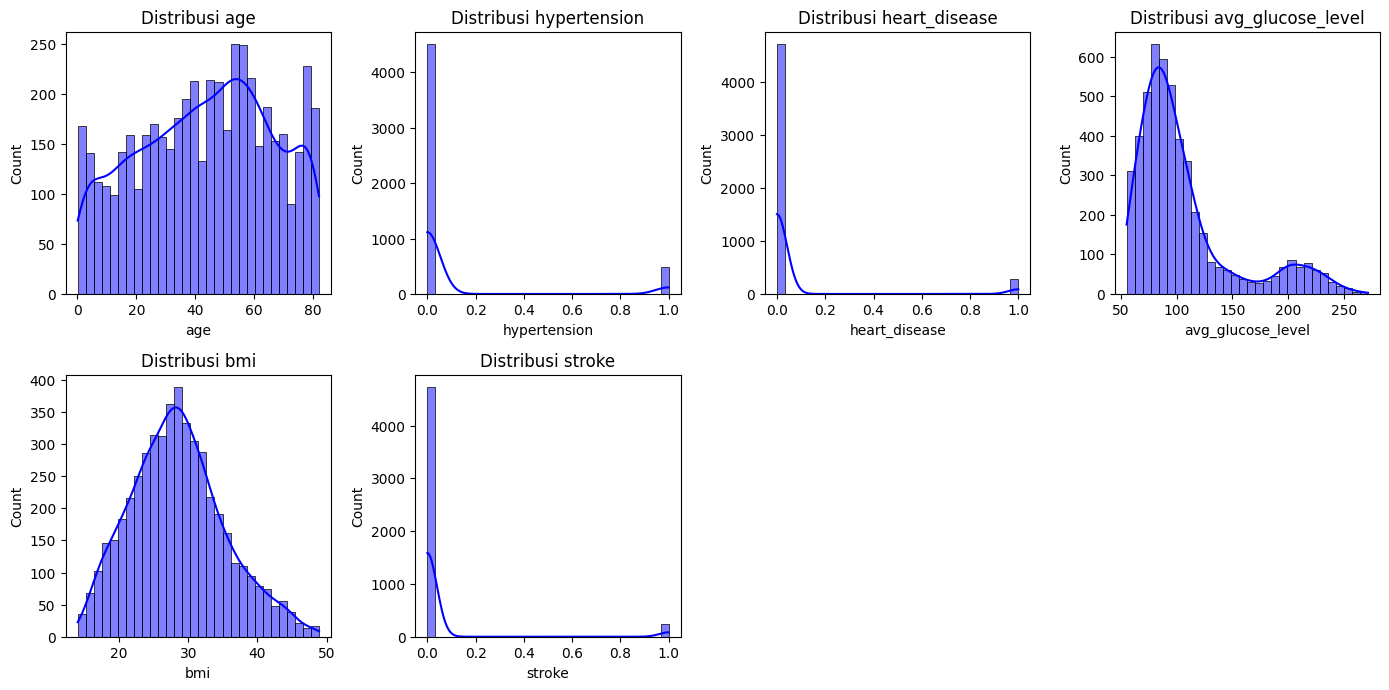

In [139]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

C:\Users\gavin\AppData\Local\Temp\ipykernel_23284\2318096391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\gavin\AppData\Local\Temp\ipykernel_23284\2318096391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\gavin\AppData\Local\Temp\ipykernel_23284\2318096391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
C:\Users\gavin\AppData\Local\Temp\ipykernel_23284\2318096391.py:5: FutureWarning: 

Passing `palette` w

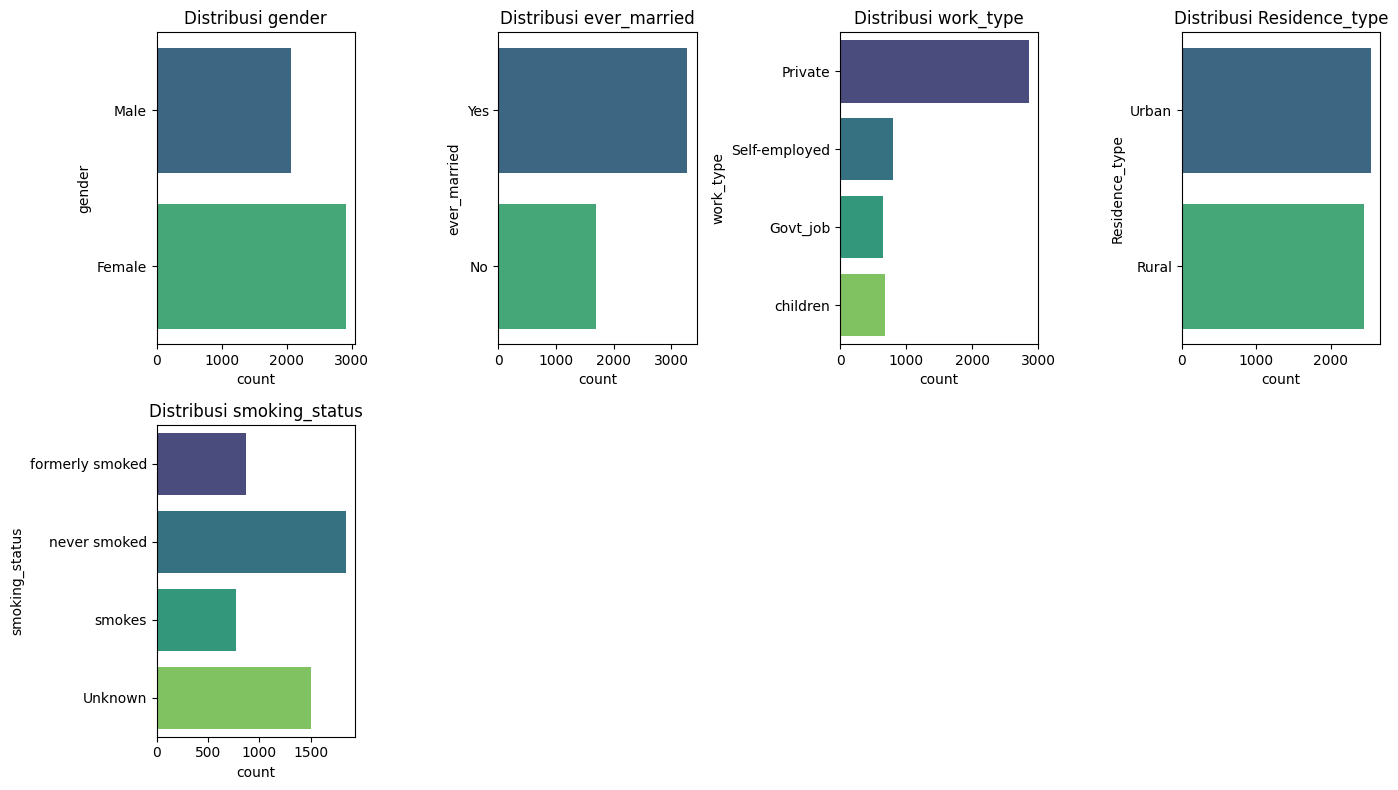

In [140]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()  
plt.show()

Correlation Heatmap

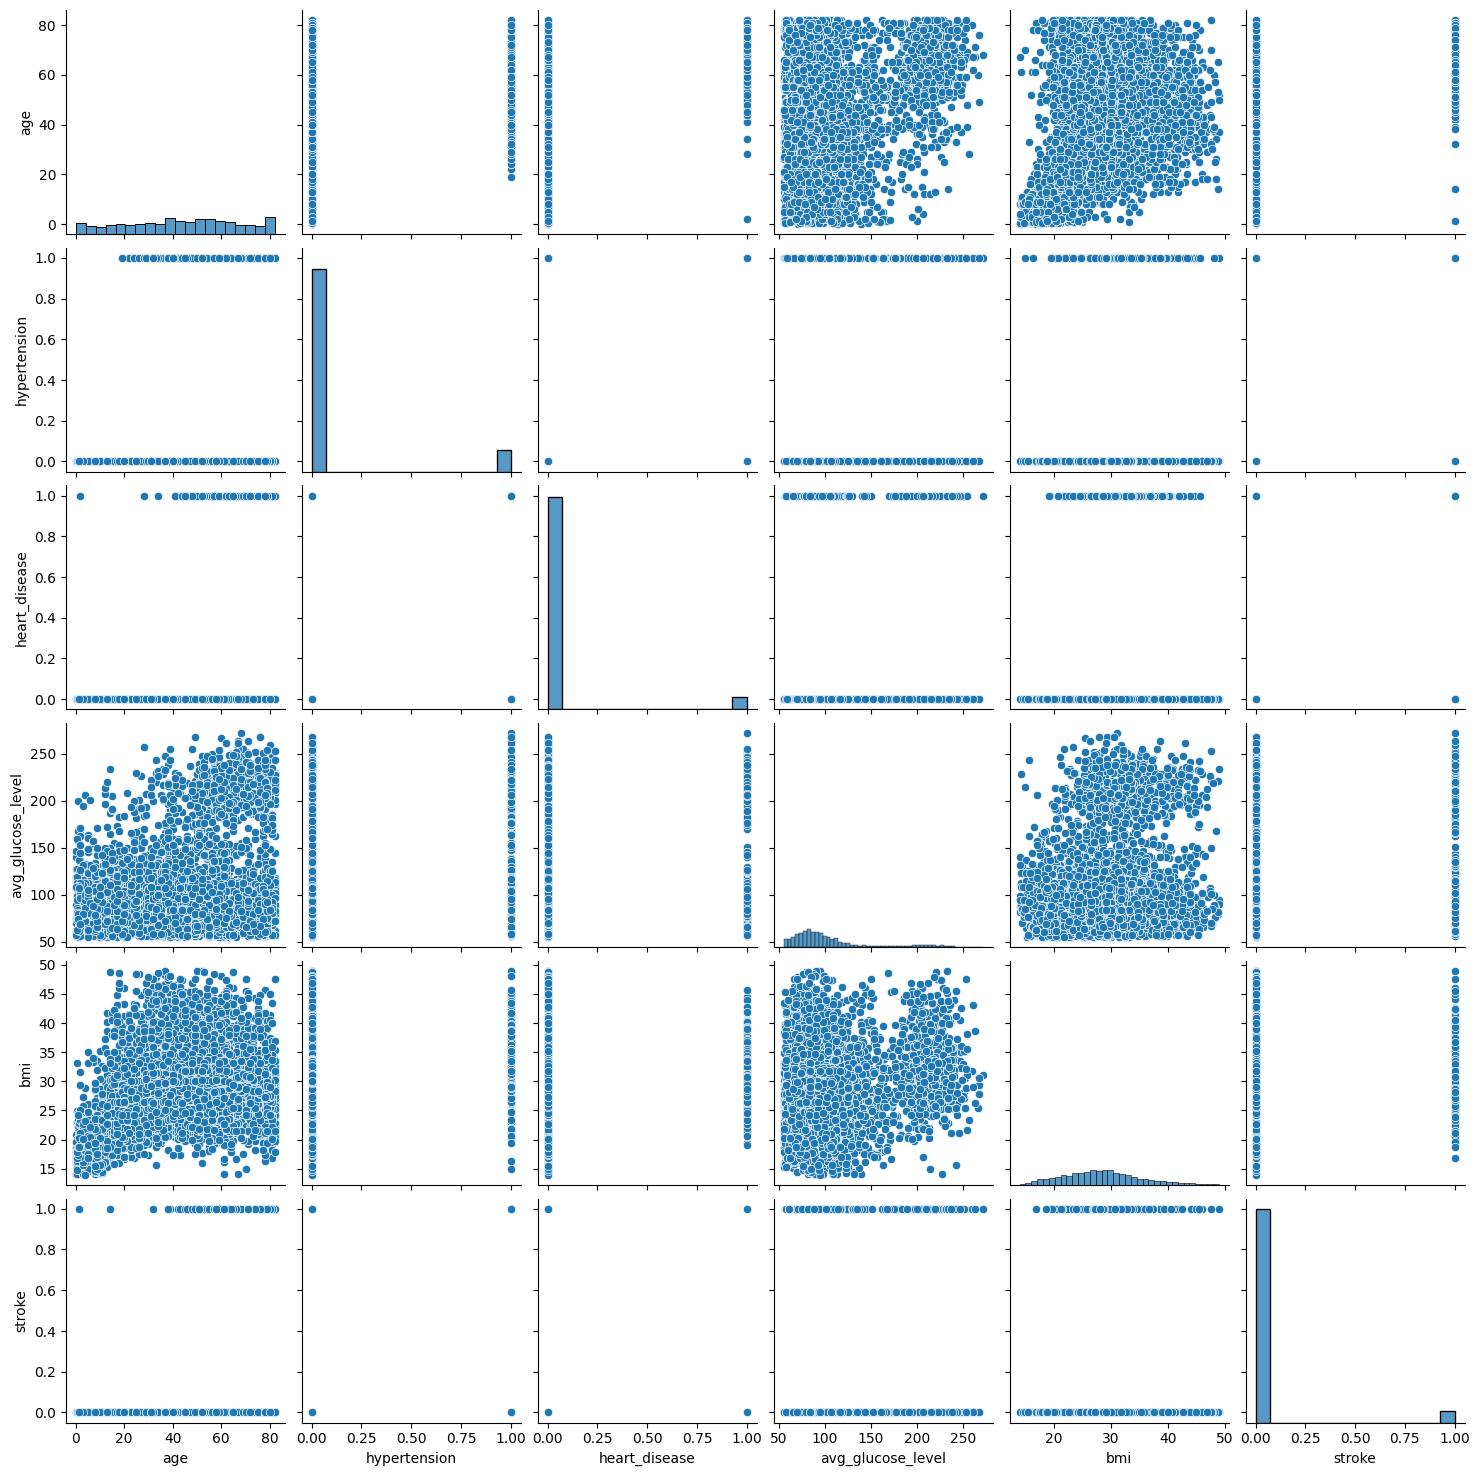

In [141]:
sns.pairplot(num_features)
plt.show()

In [142]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


gender VS stroke

In [143]:
df[['gender', 'stroke']].groupby(['gender'], as_index=False).mean()

,gender,stroke
0,Female,0.048160
1,Male,0.052073


In [144]:
df.groupby('gender').stroke.value_counts()

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: count, dtype: int64

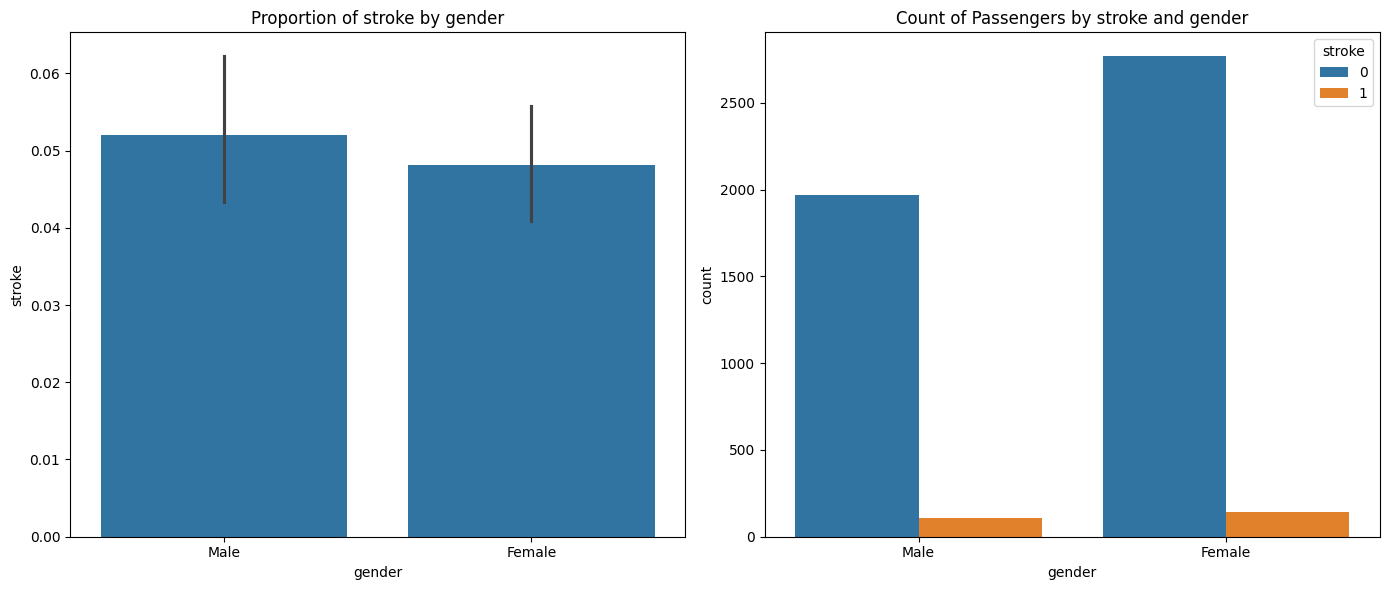

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='gender', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by gender')

sns.countplot(x='gender', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and gender')

plt.tight_layout()
plt.show()

Hypertension VS stroke

In [146]:
df[['hypertension', 'stroke']].groupby(['hypertension'], as_index=False).mean()

,hypertension,stroke
0,0,0.040426
1,1,0.137787


In [147]:
df.groupby('hypertension').stroke.value_counts()

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: count, dtype: int64

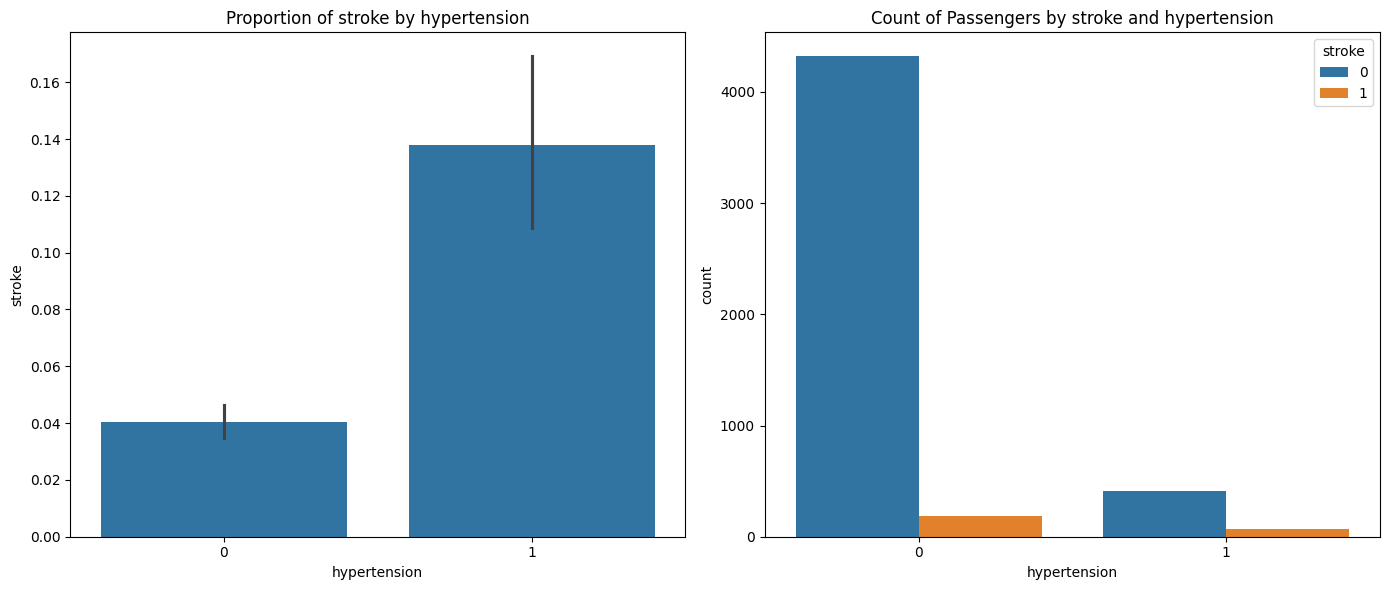

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='hypertension', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by hypertension')

sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and hypertension')

plt.tight_layout()
plt.show()

Heart Disease VS Stroke

In [149]:
df[['heart_disease', 'stroke']].groupby(['heart_disease'], as_index=False).mean()

,heart_disease,stroke
0,0,0.042711
1,1,0.170909


In [150]:
df.groupby('heart_disease').stroke.value_counts()

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: count, dtype: int64

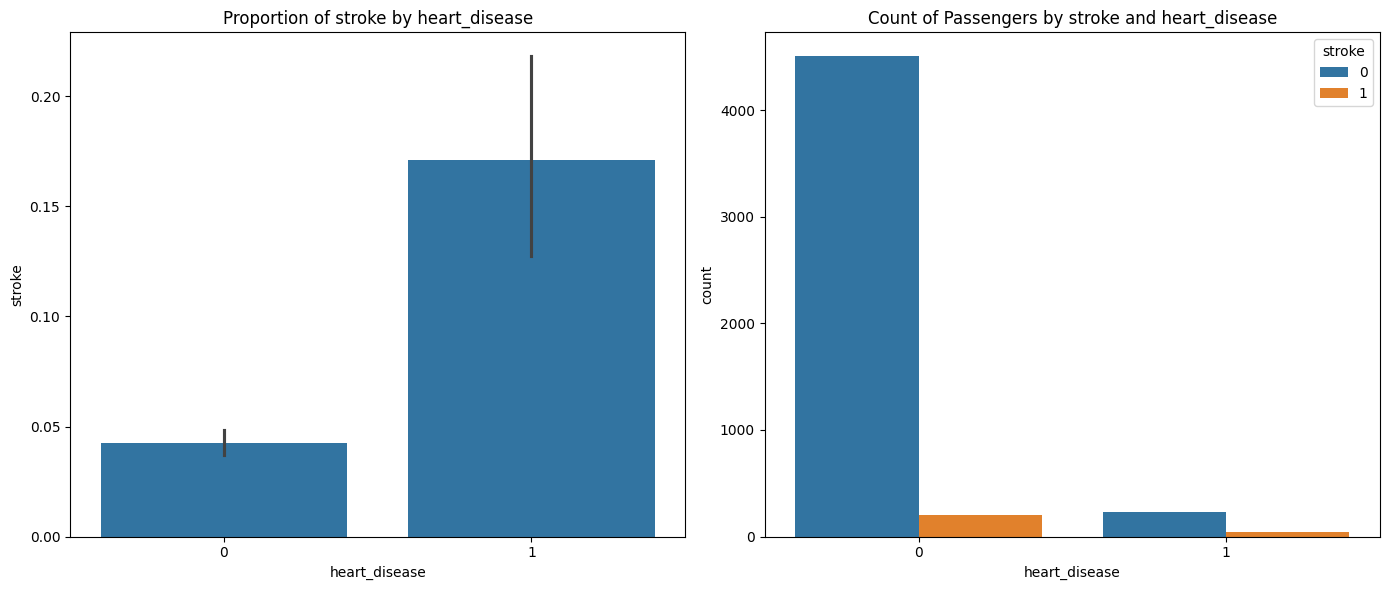

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='heart_disease', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by heart_disease')

sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and heart_disease')

plt.tight_layout()
plt.show()

In [152]:
df[['ever_married', 'stroke']].groupby(['ever_married'], as_index=False).mean()

,ever_married,stroke
0,No,0.017049
1,Yes,0.066768


In [153]:
df.groupby('ever_married').stroke.value_counts()

ever_married  stroke
No            0         1672
              1           29
Yes           0         3061
              1          219
Name: count, dtype: int64

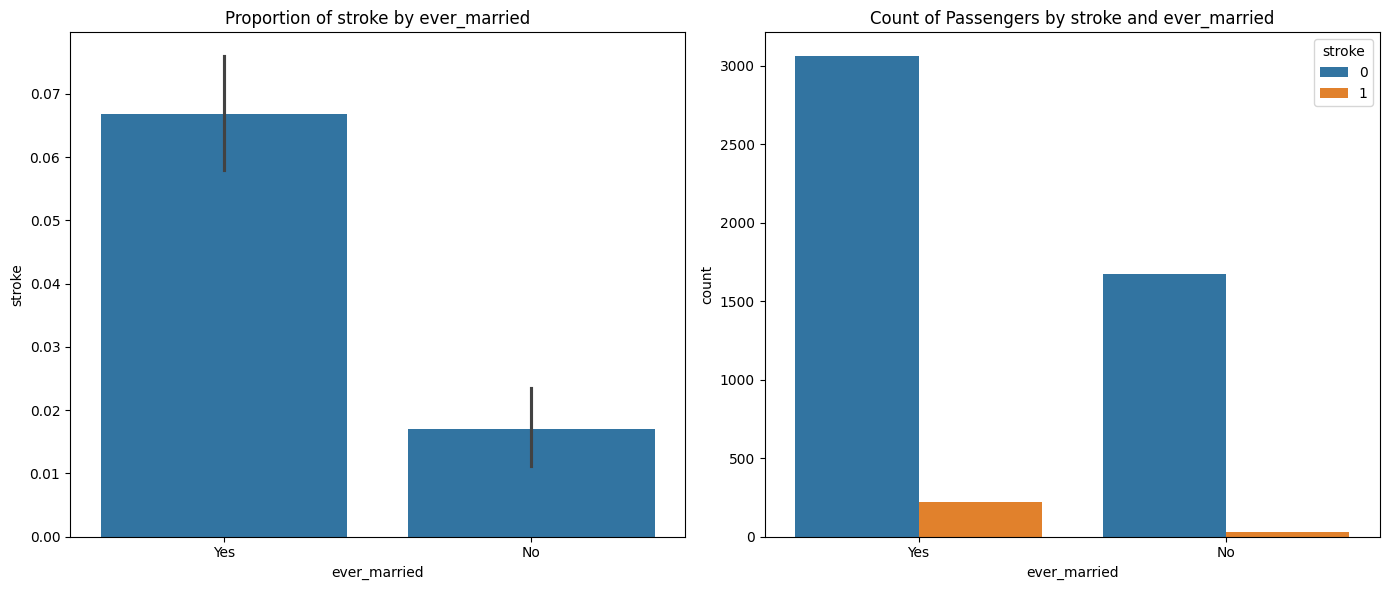

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='ever_married', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by ever_married')

sns.countplot(x='ever_married', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and ever_married')

plt.tight_layout()
plt.show()

In [155]:
df[['work_type', 'stroke']].groupby(['work_type'], as_index=False).mean()

,work_type,stroke
0,Govt_job,0.051242
1,Private,0.051748
2,Self-employed,0.080846
3,children,0.002972


In [156]:
df.groupby('work_type').stroke.value_counts()

work_type      stroke
Govt_job       0          611
               1           33
Private        0         2712
               1          148
Self-employed  0          739
               1           65
children       0          671
               1            2
Name: count, dtype: int64

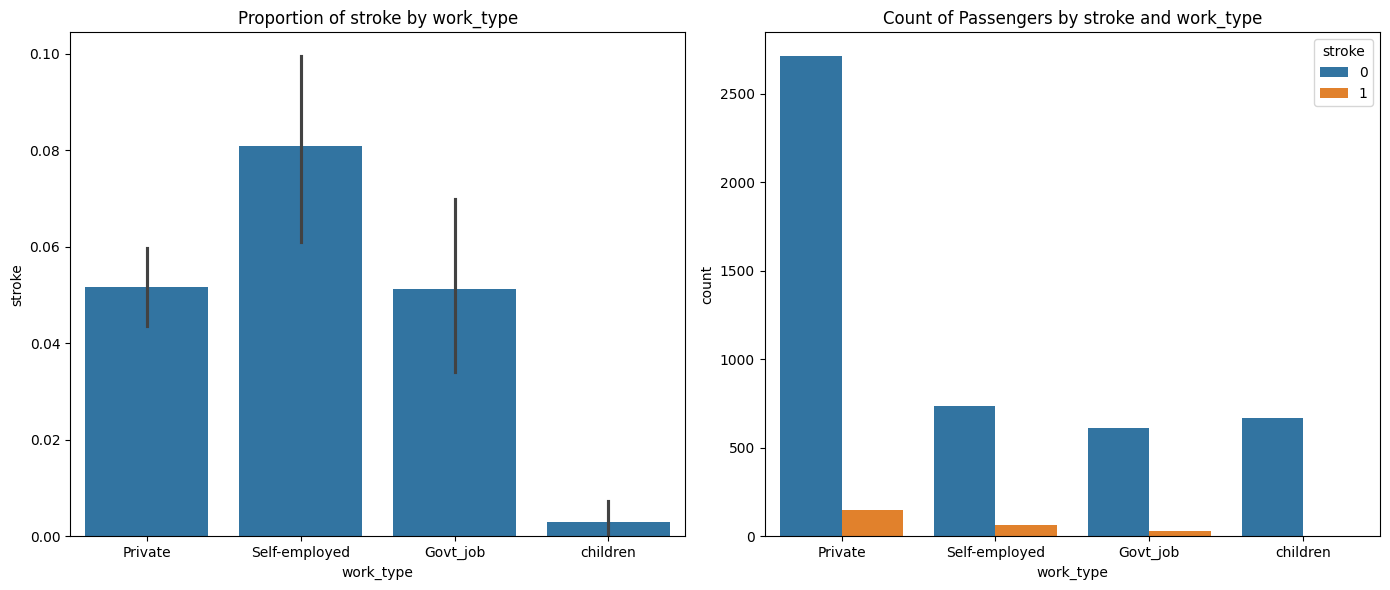

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='work_type', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by work_type')

sns.countplot(x='work_type', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and work_type')

plt.tight_layout()
plt.show()

In [158]:
df[['Residence_type', 'stroke']].groupby(['Residence_type'], as_index=False).mean()


,Residence_type,stroke
0,Rural,0.046141
1,Urban,0.053318


In [159]:
df.groupby('Residence_type').stroke.value_counts()


Residence_type  stroke
Rural           0         2336
                1          113
Urban           0         2397
                1          135
Name: count, dtype: int64

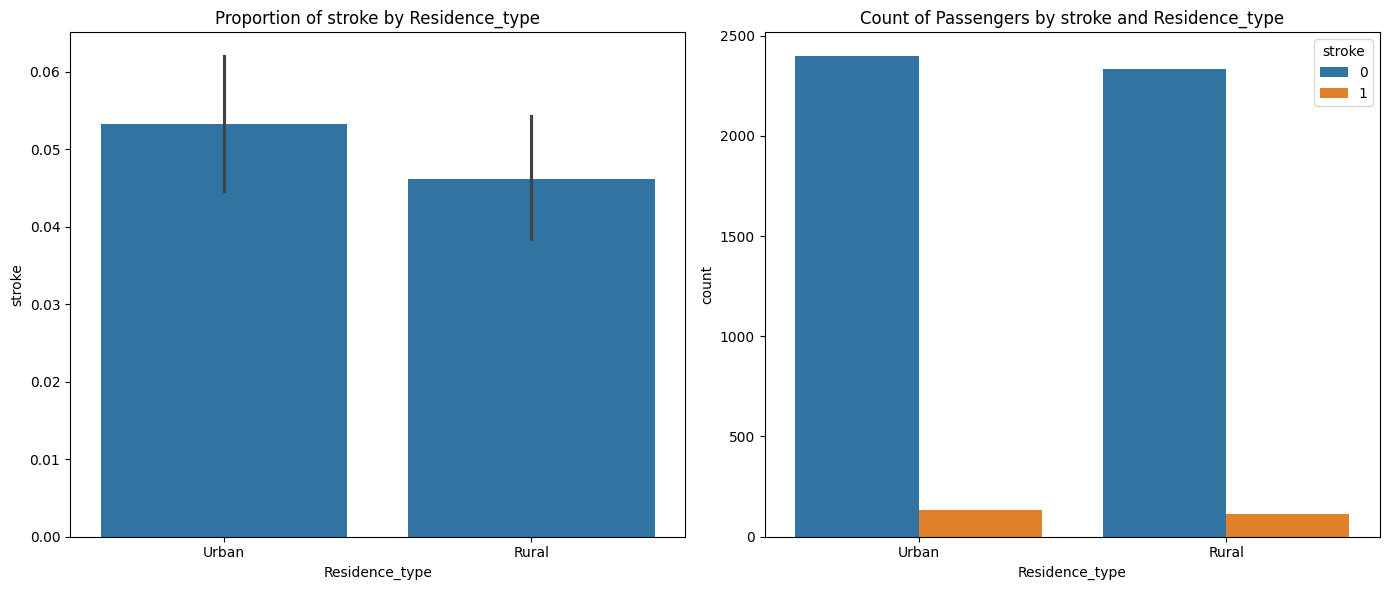

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Residence_type', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by Residence_type')

sns.countplot(x='Residence_type', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and Residence_type')

plt.tight_layout()
plt.show()

In [161]:
df[['smoking_status', 'stroke']].groupby(['smoking_status'], as_index=False).mean()

,smoking_status,stroke
0,Unknown,0.031333
1,formerly smoked,0.080738
2,never smoked,0.048422
3,smokes,0.054124


In [162]:
df.groupby('smoking_status').stroke.value_counts()

smoking_status   stroke
Unknown          0         1453
                 1           47
formerly smoked  0          797
                 1           70
never smoked     0         1749
                 1           89
smokes           0          734
                 1           42
Name: count, dtype: int64

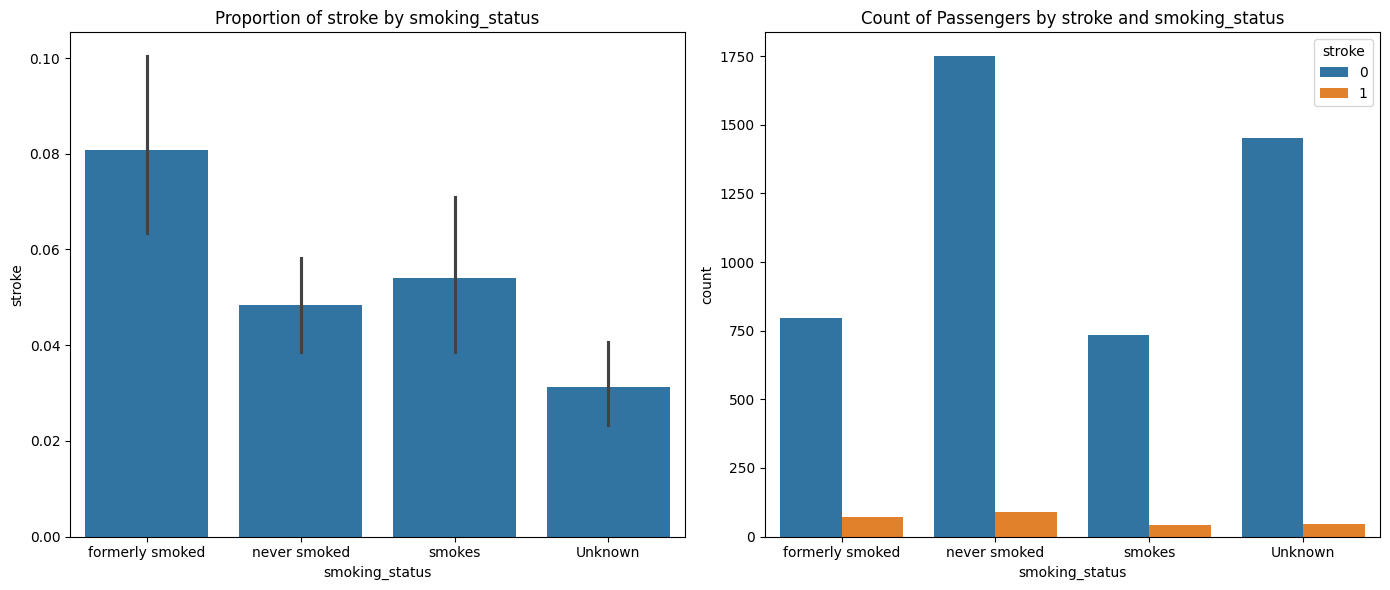

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='smoking_status', y='stroke', data=df, ax=axes[0])
axes[0].set_title('Proportion of stroke by smoking_status')

sns.countplot(x='smoking_status', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Count of Passengers by stroke and smoking_status')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age (years)')

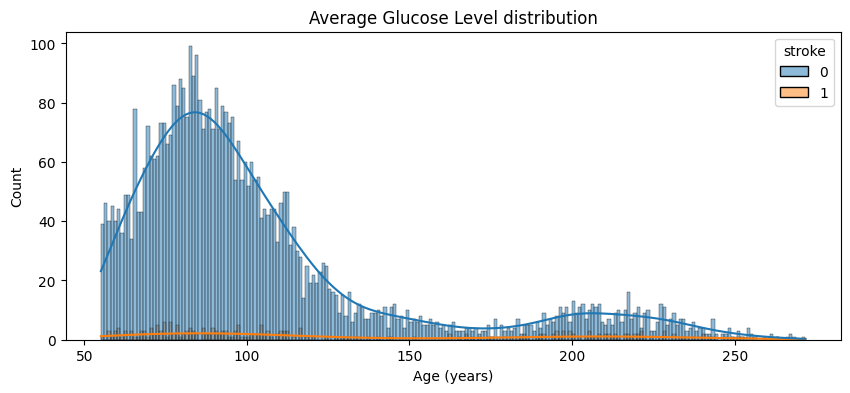

In [164]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', binwidth=1, kde=True)
plt.title('Average Glucose Level distribution')
plt.xlabel('Age (years)')

Text(0.5, 0, 'Age (years)')

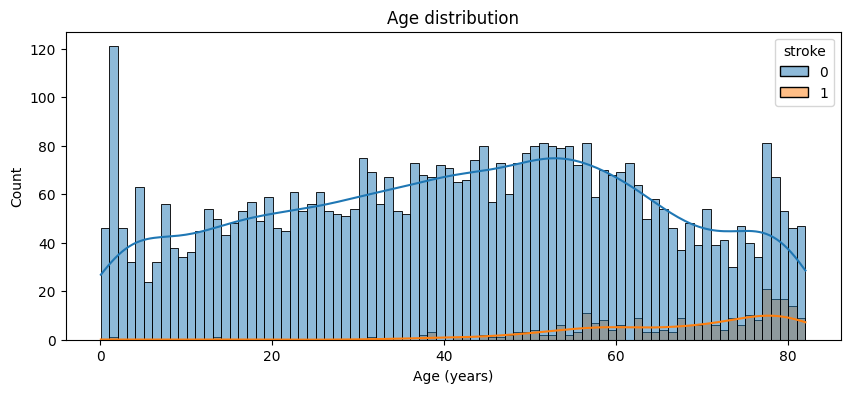

In [165]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='age', hue='stroke', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

In [166]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [167]:
le = LabelEncoder()
le.fit(['Male', 'Female', 'Yes', 'No', 'Govt_job', 'Private', 'Self-employed', 'children', 'Rural', 'Urban',
        'formerly smoked', 'never smoked', 'smokes', 'Unknown'])

for col in categorical:
    df[col] = le.fit_transform(df[col])

In [168]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


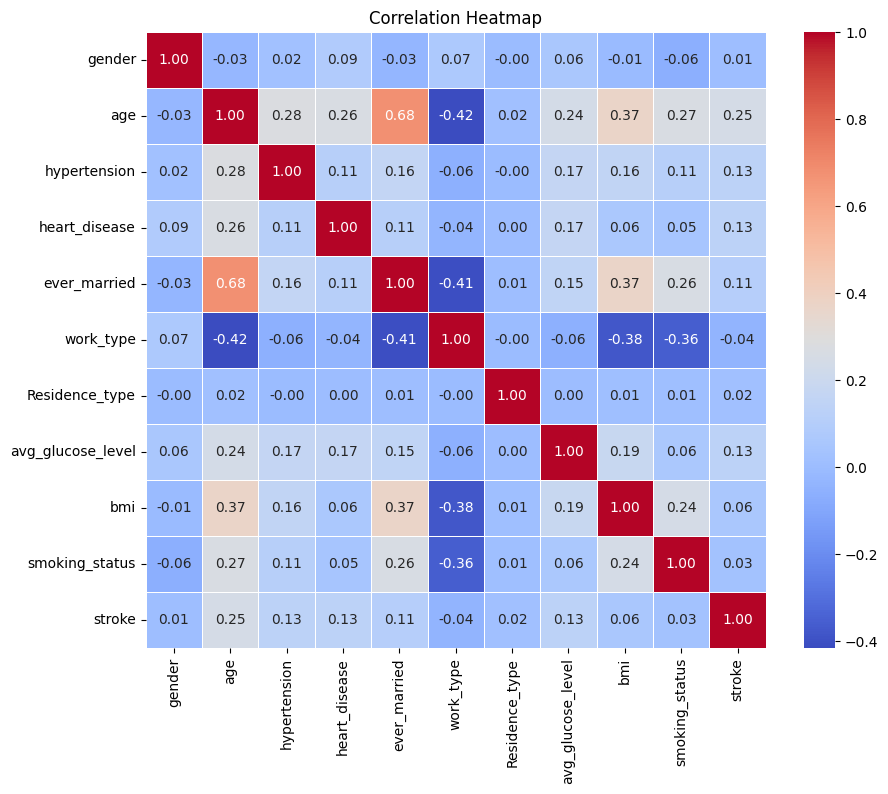

In [169]:
corr_heatmap = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_heatmap, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dari gambar heatmap tersebut, kita dapat menganalisis beberapa korelasi di dalam fitur yaitu:

1. Hubungan antar-fitur:

- Korelasi tinggi antara age dan ever_married (0.68): Semakin tua usia seseorang, semakin besar kemungkinan mereka sudah menikah.
- Korelasi antara fitur lain sebagian besar lemah, yang menunjukkan bahwa fitur-fitur tersebut tidak memiliki hubungan linier yang kuat satu sama lain.

2. Korelasi dengan target (stroke):

- Fitur yang memiliki korelasi tertinggi dengan stroke adalah:
    - age (0.25): Usia berpengaruh positif terhadap kemungkinan terkena stroke, menunjukkan bahwa orang yang lebih tua memiliki risiko stroke yang lebih tinggi.
    - hypertension (0.13) dan heart_disease (0.13): Riwayat hipertensi dan penyakit jantung berkontribusi terhadap risiko stroke, meskipun korelasinya cukup lemah.
    - ever_married (0.11): Orang yang pernah menikah cenderung memiliki risiko stroke yang sedikit lebih tinggi.
    - avg_glucose_level (0.13): Tingkat glukosa yang lebih tinggi juga memiliki korelasi lemah tetapi signifikan terhadap stroke.

- Fitur dengan korelasi sangat lemah terhadap stroke:
    - gender, work_type, Residence_type, smoking_status, dan bmi memiliki korelasi sangat rendah dengan nilai mendekati nol, menunjukkan bahwa fitur-fitur ini mungkin kurang relevan sebagai penyebab langsung stroke atau hubungannya tidak linier.

Interpretasi penting:
Korelasi rendah antara fitur seperti gender atau Residence_type dan stroke tidak berarti fitur tersebut sepenuhnya tidak relevan—fitur ini mungkin memengaruhi target secara tidak langsung atau dalam kondisi tertentu.

Ini dapat diasumsikan bahwa **age** merupakan faktor terbesar untuk prediksi stroke  

In [170]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [171]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [172]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


## OVERSAMPLING USING SMOTE

In [173]:
df1 = df.copy()
X = df.drop('stroke', axis=1)
Y = df['stroke']
Y = pd.DataFrame(Y)


In [174]:
smote = SMOTE(random_state=10)
X1, Y1 = smote.fit_resample(X,Y)

In [175]:
Y.value_counts()

stroke
0         4733
1          248
Name: count, dtype: int64

In [176]:
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         4733
1         4733
Name: count, dtype: int64

In [177]:
X1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,1,1,228.690000,36.600000,1
1,1,80.000000,0,1,1,1,0,105.920000,32.500000,2
2,0,49.000000,0,0,1,1,1,171.230000,34.400000,3
3,0,79.000000,1,0,1,2,0,174.120000,24.000000,2
4,1,81.000000,0,0,1,1,1,186.210000,29.000000,1
...,...,...,...,...,...,...,...,...,...,...
9461,0,62.046674,0,0,1,0,0,199.766016,31.600000,2
9462,0,35.424820,0,0,1,1,0,79.608638,28.138664,2
9463,0,80.724886,1,0,1,2,0,73.648595,26.072947,2
9464,0,79.106464,0,0,1,1,0,78.769430,19.526236,0


In [178]:
Y1

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
9461,1
9462,1
9463,1
9464,1


Split Dataset yang sudah di oversampling

In [180]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(7572, 10), y_train=(7572, 1)
Test set shape: X_test=(1894, 10), y_test=(1894, 1)


In [181]:
y_train.value_counts()

stroke
0         3787
1         3785
Name: count, dtype: int64

Training Model

In [182]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [183]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
472,1.0,0.877930,1.0,0.0,1.0,0.666667,1.0,0.271859,0.510029,0.333333
4123,0.0,0.084473,0.0,0.0,0.0,1.000000,0.0,0.066245,0.140401,0.000000
9103,0.0,0.550045,0.0,0.0,1.0,0.333333,0.0,0.041119,0.441761,0.666667
4091,0.0,0.499512,0.0,0.0,1.0,0.333333,1.0,0.097960,0.401146,0.000000
5391,0.0,0.944313,0.0,0.0,1.0,0.666667,0.0,0.232973,0.358459,0.333333


c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Confusion Matrix:


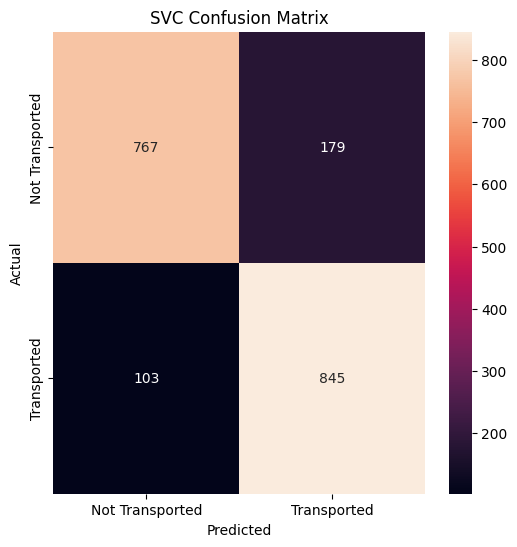

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       946
           1       0.83      0.89      0.86       948

    accuracy                           0.85      1894
   macro avg       0.85      0.85      0.85      1894
weighted avg       0.85      0.85      0.85      1894

roc_auc_score for SVM:  0.9192658852284993


In [184]:
svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

cm_svc = confusion_matrix(y_test, y_pred_svc)
print("SVC Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_svc, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

y_score_svc_model = svc_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score_svc_model)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_score_svc_model))

KNN Confusion Matrix:


c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


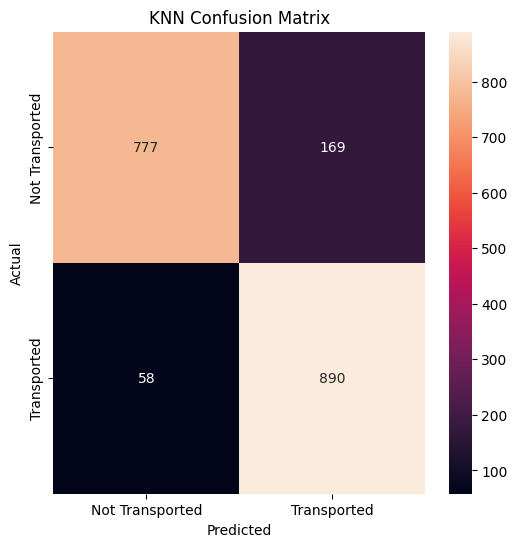

RF Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       946
           1       0.84      0.94      0.89       948

    accuracy                           0.88      1894
   macro avg       0.89      0.88      0.88      1894
weighted avg       0.89      0.88      0.88      1894

roc_auc_score for KNN:  0.9381183040294021


In [185]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

print("RF Classification Report:")
print(classification_report(y_test, y_pred_knn))

y_score_knn_model = knn_model.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score_knn_model)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score_knn_model))

c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF Confusion Matrix:


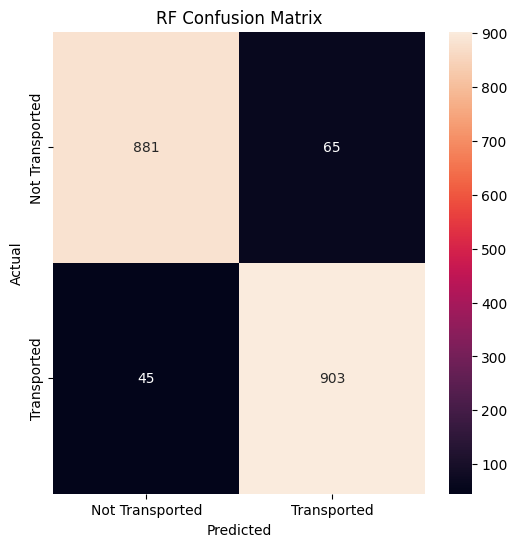

RF Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       946
           1       0.93      0.95      0.94       948

    accuracy                           0.94      1894
   macro avg       0.94      0.94      0.94      1894
weighted avg       0.94      0.94      0.94      1894

roc_auc_score for Random Forest:  0.9880230774034129


In [186]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("RF Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix')
plt.show()

print("RF Classification Report:")
print(classification_report(y_test, y_pred_rf))

y_score_rf_model = rf_model.predict_proba(X_test)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score_rf_model)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score_rf_model))

NB Confusion Matrix:


c:\Users\gavin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


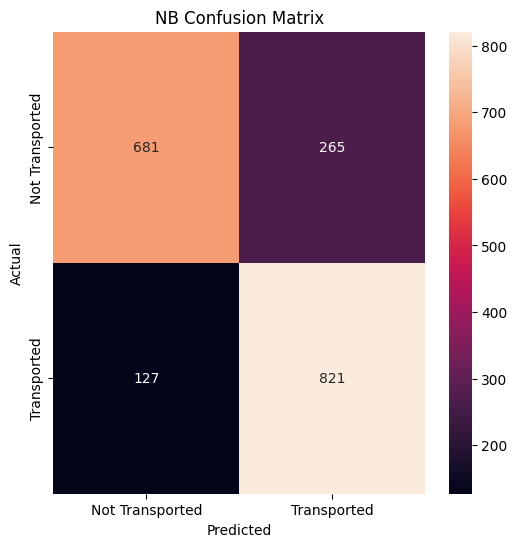

NB Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       946
           1       0.76      0.87      0.81       948

    accuracy                           0.79      1894
   macro avg       0.80      0.79      0.79      1894
weighted avg       0.80      0.79      0.79      1894

roc_auc_score for Gaussian Naive Bayes:  0.8717696541511671


In [187]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("NB Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_nb, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NB Confusion Matrix')
plt.show()

print("NB Classification Report:")
print(classification_report(y_test, y_pred_nb))

y_score_nb_model = nb_model.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score_nb_model)
print('roc_auc_score for Gaussian Naive Bayes: ', roc_auc_score(y_test, y_score_nb_model))

DT Confusion Matrix:


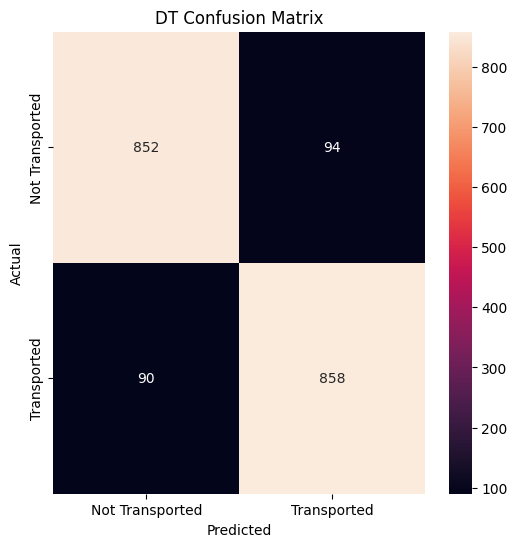

DT Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       946
           1       0.90      0.91      0.90       948

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894

roc_auc_score for Decision Tree:  0.9028487703053496


In [188]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("DT Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_dt, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DT Confusion Matrix')
plt.show()

print("DT Classification Report:")
print(classification_report(y_test, y_pred_dt))

y_score_dt_model = dt_model.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score_dt_model)
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score_dt_model))

XGBoost Confusion Matrix:


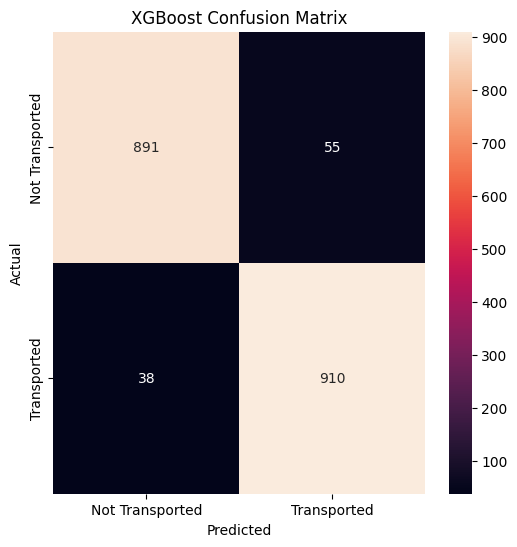

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       946
           1       0.94      0.96      0.95       948

    accuracy                           0.95      1894
   macro avg       0.95      0.95      0.95      1894
weighted avg       0.95      0.95      0.95      1894

roc_auc_score for XGBoost:  0.9889128999741303


In [189]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
plt.figure(figsize=(6,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', xticklabels=['Not Transported', 'Transported'], yticklabels=['Not Transported', 'Transported'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

y_score_xgb_model = xgb_model.predict_proba(X_test)[:,1]
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score_xgb_model)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_score_xgb_model))

In [190]:
A = {'Models' : ['SVM','KNN', 'Random Forest', 'Gaussian Naive Bayes', 'Decision Tree',
                 'XGBoost'],'AUC Scores'
     :[ roc_auc_score(y_test, y_score_svc_model), roc_auc_score(y_test, y_score_knn_model), 
       roc_auc_score(y_test, y_score_rf_model), roc_auc_score(y_test, y_score_nb_model),
       roc_auc_score(y_test, y_score_dt_model), roc_auc_score(y_test, y_score_xgb_model)]}
A = pd.DataFrame(A)
A

,Models,AUC Scores
0,SVM,0.919266
1,KNN,0.938118
2,Random Forest,0.988023
3,Gaussian Naive Bayes,0.871770
4,Decision Tree,0.902849
5,XGBoost,0.988913


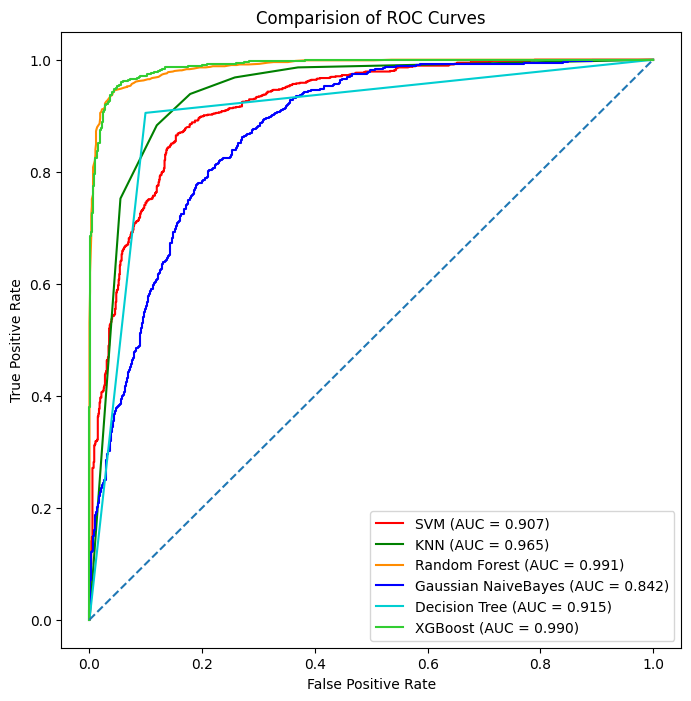

In [191]:
plt.figure(figsize=(8,8))
plt.title('Comparision of ROC Curves')
plt.plot(false_positive_rate1, true_positive_rate1, color = 'red', label = 'SVM (AUC = 0.907) ')
plt.plot(false_positive_rate2, true_positive_rate2, color = 'green', label = 'KNN (AUC = 0.965)')
plt.plot(false_positive_rate3, true_positive_rate3, color = 'darkorange', label = 'Random Forest (AUC = 0.991)')
plt.plot(false_positive_rate4, true_positive_rate4, color = 'blue', label = 'Gaussian NaiveBayes (AUC = 0.842)')
plt.plot(false_positive_rate5, true_positive_rate5, color = 'darkturquoise', label = 'Decision Tree (AUC = 0.915)')
plt.plot(false_positive_rate6, true_positive_rate6, color = 'limegreen', label = 'XGBoost (AUC = 0.990)')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [192]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [193]:
import pickle

model_data = {
    'model': rf_model,
    'labelEncoder': le,
    'Scaler': scaler,
    'feature_names': X_train.columns.tolist(),
}

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)   
